<a href="https://colab.research.google.com/github/JuanBenavidesR/JBdBroker/blob/master/G3_Week2_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer Wisconsin Dataset**

En este ejemplo, trabajaremos con la base de datos Breast Cancer Wisconsin Dataset, la cual contiene 569 instancias que representan tumores benignos y malignos. La primera columa de la base de datos, almacena el ID de cada instancia, mientras que la segunda columna almacena la etiqueta de dicha instancia, donde esta etiqueta corresponde al diagnóstico (M=Maligno, B=Beningno). Las columnas 3-32 registran los valores númericos que se relacionan con las características del núcleo celular, tales como el radio, perímetro, concavidad, entre otros.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

In [ ]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.shape

(569, 32)

Procedemos a extraer los atributos de cada instancia y sus etiquetas correspondientes. Así mismo, hacemos que las etiquetas, originalmente codificadas como caracteres, se conviertan en enteros.

In [ ]:
dataset = data.loc[:, 2:].values
labels = data.loc[:, 1].values
print(labels)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [ ]:
dataset[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [ ]:
dataset.shape

(569, 30)

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Transformamos las etiquetas de caracter a enteros
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

In [ ]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

Podemos ver como las etiquetas que originalmente estaban codificadas a partir de los caracteres "B" y "M", ahora se representan mediante valores enteros "1" y "0", respectivamente. 

In [ ]:
encoder.classes_

array(['B', 'M'], dtype=object)

In [ ]:
encoder.transform(['M', 'B'])

array([1, 0])

# **Partición de la base de datos**

In [ ]:
#La clase train_test_split permite realizar la partición de la base de datos en los conjuntos de entrenamiento y de prueba.
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(dataset, labels, test_size=0.10, stratify=labels, random_state=1)
#test_size es un argumento que nos permitirá especificar la proporción de instancias que serán asignadas al conjunto de prueba
#stratify indica que los conjuntos de entrenamiento y de prueba, tienen la misma proporción de etiquetas de clase presente en la base de datos original
#random_state hace posible que las instancias de los conjuntos sean inicializadas aleatoriamente, y al asignarle un valor fijo, nos aseguramos de poder
#general resultados reproducibles.

# **Preprocesamiento de los datos**

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data_std = sc.fit_transform(train_data)
test_data_std = sc.transform(test_data)

In [ ]:
train_data_std.shape

(512, 30)

In [ ]:
test_data_std.shape

(57, 30)

# **Construcción de la red neuronal**

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(30,))) #Primera capa oculta
model.add(layers.Dropout(0.1)) #Dropout permite regularizar a la red neuronal durante la etapa de entrenamiento, y se aplica sobre las neuronas de la capa anterior
model.add(layers.Dense(16, activation='relu')) #Segunda capa oculta
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))#Capa de salida

Mediante la operación de ***Dropout***, se desactiva de forma aleatoria un determinado número de neuronas de la capa previa. El origen de la técnica de ***Dropout***, se debe a la siguiente anécdota narrada por su propio creador, Geoffrey Hinton:<br>
*“Fui a mi banco. Los cajeros cambiaban continuamente y le pregunté a uno de ellos el porqué. Él me dijo que no lo sabía, pero que los cambiaban seguido. Me di cuenta de que esto se debía a que se requiere de cooperación entre los empleados para defraudar al banco. Esto hizo que me diera cuenta de que, el remover aleatoriamente un subconjunto de neuronas por cada ejemplo, prevendría conspiraciones y por lo tanto reduciría el sobreajuste”.* <br><br>
En este contexto, el *sobreajuste* es un fenómeno que provoca que un modelo de machine learning tenga un rendimiento sobresaliente en el conjunto de entrenamiento, pero no en el conjunto que se utilice para validar su desempeño. Es decir, el sobreajuste indica que el modelo es incapaz de tener un desempeño adecuado ante instancias que no forman parte del conjunto de entrenamiento. 


# **Compilación**

In [ ]:
from tensorflow.keras import optimizers
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# **Entrenamiento**

In [ ]:
history = model.fit(train_data,
                    train_labels,
                    epochs=150,
                    batch_size=100)

Epoch 1/150
6/6 [==============================] - 1s 3ms/step - loss: 33.5002 - accuracy: 0.4699
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 25.4602 - accuracy: 0.4943
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 22.4118 - accuracy: 0.5074
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 23.7990 - accuracy: 0.5315
Epoch 5/150
6/6 [==============================] - 0s 3ms/step - loss: 17.5915 - accuracy: 0.6493
Epoch 6/150
6/6 [==============================] - 0s 3ms/step - loss: 18.8481 - accuracy: 0.6034
Epoch 7/150
6/6 [==============================] - 0s 3ms/step - loss: 15.7701 - accuracy: 0.6525
Epoch 8/150
6/6 [==============================] - 0s 3ms/step - loss: 15.4833 - accuracy: 0.6100
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 13.1375 - accuracy: 0.6982
Epoch 10/150
6/6 [==============================] - 0s 3ms/step - loss: 12.5956 - accuracy: 0.6578
Epoch 11/150
6/6 [=

# **Curva de pérdida**

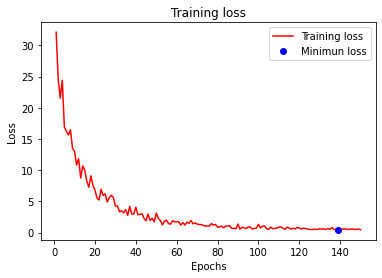

Best epoch:  139
Best loss  0.43106579780578613


In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
min_loss = min(loss)
min_loss_epoch= loss.index(min(loss)) + 1

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(min_loss_epoch, min_loss, 'bo', label='Minimun loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
print('Best epoch: ', min_loss_epoch)
print('Best loss ', min_loss)

# **Curva de precisión**

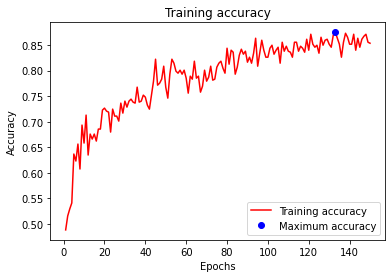

Best epoch:  133
Best acc  0.875


In [ ]:
plt.clf()   # clear figure

acc = history.history['accuracy']
max_acc = max(acc)
max_acc_epoch= acc.index(max(acc)) + 1

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(max_acc_epoch, max_acc, 'bo', label='Maximum accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
print('Best epoch: ', max_acc_epoch)
print('Best acc ', max_acc)

# **Predicción**

Para esta etapa, mediante la expresión y_pred = (y_pred > 0.5), hacemos que aquellas instancias de entrada que tengan como resultado de salida un valor mayor a 0.5, sean representadas como "True" o 1, mientras que aquellas que tenga un valor menor a 0.5, sean representadas como "False" o 0.

In [ ]:
test_predictions = model.predict(test_data)
test_predictions

array([[0.24817118],
       [0.05316317],
       [0.83526564],
       [0.99765515],
       [0.02153   ],
       [1.        ],
       [0.0704402 ],
       [0.02361855],
       [0.18075722],
       [0.6227789 ],
       [0.10705462],
       [0.92702454],
       [0.03349093],
       [0.10151786],
       [0.09124604],
       [0.01609105],
       [0.6650328 ],
       [0.16915187],
       [0.08318588],
       [0.1266293 ],
       [1.        ],
       [0.26513702],
       [0.5990675 ],
       [0.26779145],
       [0.03923577],
       [0.90380454],
       [0.06437674],
       [0.08172265],
       [0.0294562 ],
       [0.16436395],
       [0.351242  ],
       [0.17766017],
       [0.4414112 ],
       [0.01675534],
       [0.999999  ],
       [0.80389005],
       [0.09633428],
       [0.24183694],
       [0.99999654],
       [0.10166022],
       [0.3800786 ],
       [0.99998647],
       [0.13003805],
       [0.181263  ],
       [0.48277146],
       [0.99993986],
       [0.4371536 ],
       [0.522

In [ ]:
test_predictions = (test_predictions > 0.5)
print(test_predictions)

[[False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]]


# **Matriz de confusión**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_predictions)

In [ ]:
cm

array([[36,  0],
       [ 2, 19]])

0
1
0
1


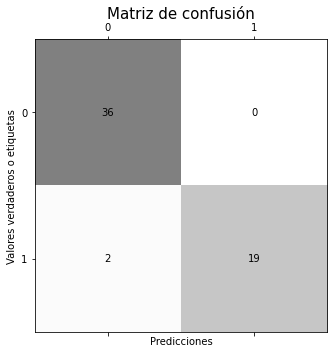

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Greys, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

plt.title("Matriz de confusión", fontsize=15)
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos o etiquetas')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

NOTA: La arquitectura presentada en este notebook, los parámetros usados para entrenar dicha arquitectura y el código referente a la matriz de confusión, incluyendo el mapa de calor, se tomaron de: https://www.kaggle.com/thebrownviking20/intro-to-keras-with-breast-cancer-data-ann. Se recomienda leer dicha referencia, pues es un artículo introductorio sumamente accesible y didáctico.

# **Evaluación del desempeño con base a las métricas de precisión, recall y F1.**

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=test_labels, y_pred=test_predictions, average = 'binary'))
print('Recall: %.3f' % recall_score(y_true=test_labels, y_pred=test_predictions, average = 'binary'))
print('F1: %.3f' % f1_score(y_true=test_labels, y_pred=test_predictions, average = 'binary'))

Precision: 1.000
Recall: 0.905
F1: 0.950
